(60000, 784)
Shape of training sample: (60000, 784)
Shape of projected sample: (60000, 500)


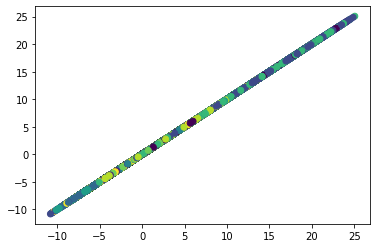

In [ ]:
!pip install mnist
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mnist

class PCA:
  def __init__(self ,n_dim):
    self.n_dim=n_dim
    self.components=None
    self.mean=None

  def fit(self,X):
    self.mean=np.mean(X,axis=0)
    X=X- self.mean
    matrix=np.cov(X.T)

# calculating the eigenvalues and eigenvectors using numpy

    eigenvectors,eigenvalues=np.linalg.eig(matrix)
    eigenvectors=eigenvectors.T

    # sorting the eigenvalues in descending order

    idx=np.argsort(eigenvalues)[::-1]
    eigenvalues=eigenvalues[idx]
    eigenvectors=eigenvectors[idx]

# taking n eigenvectors corresponding to largest n eigenvalues for n dimention subspace. 
    self.components=eigenvectors[0:self.n_dim]

  def project(self,X):
    X=X-self.mean
    return np.dot(X,self.components.T)

# Loading mnist dataset

train_sample=mnist.train_images()
train_labels=mnist.train_labels()

#Normalising the training dataset 
train_sample=train_sample/255.0

#Flattening  the dataset
train_sample=train_sample.reshape((-1,784))

train_sample=train_sample.reshape((-1,784))
print(train_sample.shape)

#Calling PCA with 500 dimentions

pca=PCA(500)
pca.fit(train_sample)

sample_projected=pca.project(train_sample)

# Shape of both training datset and projected data
print('Shape of training sample:',train_sample.shape)
print('Shape of projected sample:',sample_projected.shape)
x1=sample_projected[:,0]
x2=sample_projected[:,1]

plt.scatter(x1,x2,c=train_labels)



